In [8]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

In [9]:
from __future__ import print_function 
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchvision.models.vgg import VGG16_BN_Weights
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

PyTorch Version:  2.0.1
Torchvision Version:  0.15.2


In [10]:
IMAGE_PATH = "../../dataset/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot/image (111).JPG"
MODEL_PATH = "../scripts/from_scratch/model.pth"
num_classes = 39

In [11]:
model_ft = models.vgg16_bn()
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
model_ft.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))
model_ft.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [13]:
target_layers = [model_ft.features[-1]]

img = cv2.imread(IMAGE_PATH, 1)
img = np.float32(img) / 255
# Opencv loads as BGR:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_img = preprocess_image(img)

grad_cam = GradCAM(model=model_ft, target_layers=target_layers, use_cuda=False)

target_category = None

grayscale_cam = grad_cam(input_img, target_category)
grayscale_cam = grayscale_cam[0, :]
cam = show_cam_on_image(img, grayscale_cam, use_rgb=True)

cv2.imwrite("cam.jpg", cam)

True

### **Plotting GradCam**

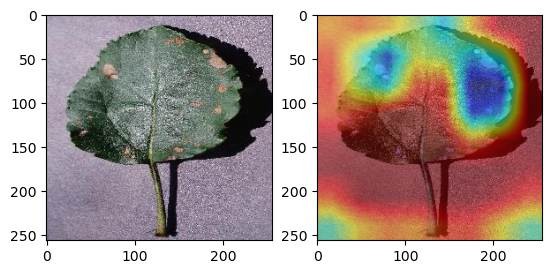

In [14]:
fig, ax = plt.subplots(1,2)
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cam = cv2.imread("./cam.jpg")
cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[1].imshow(cam)